In [54]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out Altair FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
#Load national data from SSA
national_df = pd.read_csv("Data/national_data.csv")
#Load state data from SSA
states_df = pd.read_csv("Data/states_data.csv")
#Load character/actor names
movies_df = pd.read_csv("Data/cleaned_cast_and_characters.csv")

In [56]:
# Convert the column to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the year
movies_df['release_date'] = movies_df['release_date'].dt.year

# Fill missing values with 0
movies_df['release_date'].fillna(0, inplace=True)

# Convert column to int
movies_df['release_date'] = movies_df['release_date'].astype(int)

movies_df.head()

,title,release_date,actor_first_name,genders,character_first_name
0,Toy Story,1995,Tom,M,NaN
1,Toy Story,1995,Tim,M,NaN
2,Toy Story,1995,Don,M,NaN
3,Toy Story,1995,Jim,M,NaN
4,Toy Story,1995,Wallace,M,NaN


In [57]:
# Create dataframe with actor information dropping Nan values
actors_df = movies_df[['release_date','actor_first_name','genders']].dropna(subset=['actor_first_name'])

# Get the top 500 actor_first_names
top_1000_actors = actors_df['actor_first_name'].value_counts().nlargest(1000).index

# Filter to include only rows where actor_first_name is in the top 500
top_1000_actors_df = movies_df[movies_df['actor_first_name'].isin(top_1000_actors)]

#Filter to show rows of interest
top_1000_actors_df = top_1000_actors_df[['release_date','actor_first_name','genders']]

top_1000_actors_df

,release_date,actor_first_name,genders
0,1995,Tom,M
1,1995,Tim,M
2,1995,Don,M
3,1995,Jim,M
4,1995,Wallace,M
...,...,...,...
421509,2003,Peter,M
421510,2003,Darrell,unknown
421512,1917,Nathalie,F
421514,1917,Aleksandr,unknown


In [58]:
# Create dataframe with character information dropping Nan values
character_df = movies_df[['release_date','character_first_name']].dropna(subset=['character_first_name'])

# Get the top 500 actor_first_names
top_1000_characters = character_df['character_first_name'].value_counts().nlargest(1000).index

# Filter to include only rows where actor_first_name is in the top 500
top_1000_characters_df = movies_df[movies_df['character_first_name'].isin(top_1000_characters)]

#Filter to show rows of interest
top_1000_characters_df = top_1000_characters_df[['release_date','character_first_name']]

#Show dataframe
top_1000_characters_df

,release_date,character_first_name
13,1995,Alan
14,1995,Samuel
15,1995,Judy
16,1995,Peter
17,1995,Sarah
...,...,...
421501,2003,Frank
421504,2003,Peter
421506,2003,Sammy
421507,2003,Steve


In [65]:
# Group by 'release_date' and 'actor_first_name' and count the number of occurrences
counts_per_year = top_1000_actors_df.groupby(['release_date', 'actor_first_name','genders']).size().reset_index(name='count')

# Filter zero values
counts_per_year_filtered = counts_per_year[counts_per_year['release_date'] != 0]

counts_per_year_filtered

,release_date,actor_first_name,genders,count
65,1878,Gilbert,unknown,1
66,1892,William,unknown,2
67,1894,Annie,unknown,1
68,1894,Fred,unknown,1
69,1894,Henry,unknown,1
...,...,...,...,...
82075,2020,Matt,M,1
82076,2020,Sam,M,1
82077,2020,Sigourney,F,1
82078,2020,Stephen,M,1


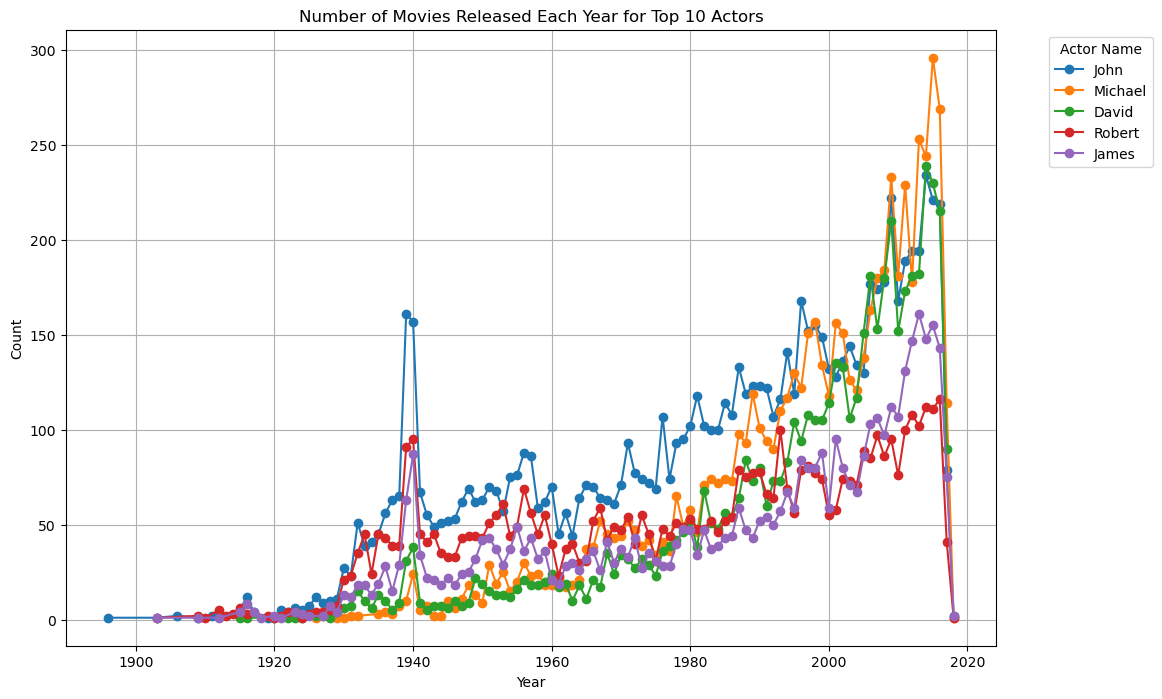

In [64]:
# Get the top ten actor names based on their total counts
top_ten_names = counts_per_year_filtered.groupby('actor_first_name')['count'].sum().nlargest(5).index

plt.figure(figsize=(12, 8))
for actor_name in top_ten_names:
    actor_data = counts_per_year_filtered[counts_per_year_filtered['actor_first_name'] == actor_name]
    plt.plot(actor_data['release_date'], actor_data['count'], marker='o', label=actor_name)

plt.title('Number of Movies Released Each Year for Top 10 Actors')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Actor Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()